## イベントマッチのブキ勝率

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
from packages.japanize import japanize
import packages.db as db
from packages.i18n import Locale, Translator
import packages.image as image
import packages.definitions as d
import packages.utils as u
import packages.visualize as v

locale = Locale.JA
lobby = d.Lobby.EVENT
date_from = dt.date(2023, 6, 28)
date_to = dt.date(2023, 6, 29)
battles = db.load_battles(lobby=lobby, date_from=date_from, date_to=date_to)

In [2]:
event = battles["event"].value_counts().index[0]
battles["event"].value_counts()

Foggy Notion    4512
Name: event, dtype: int64

パワー不明バトル数: 1810


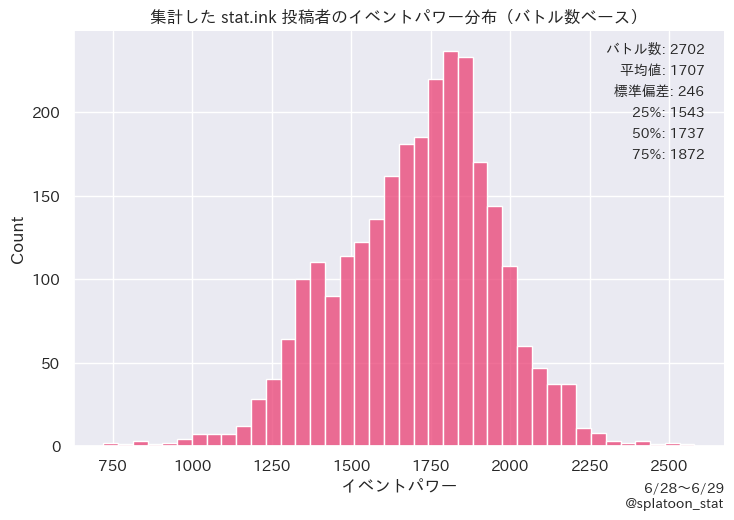

In [3]:
v.event_power_distribution(battles, locale)

In [4]:
players = u.to_players(battles)

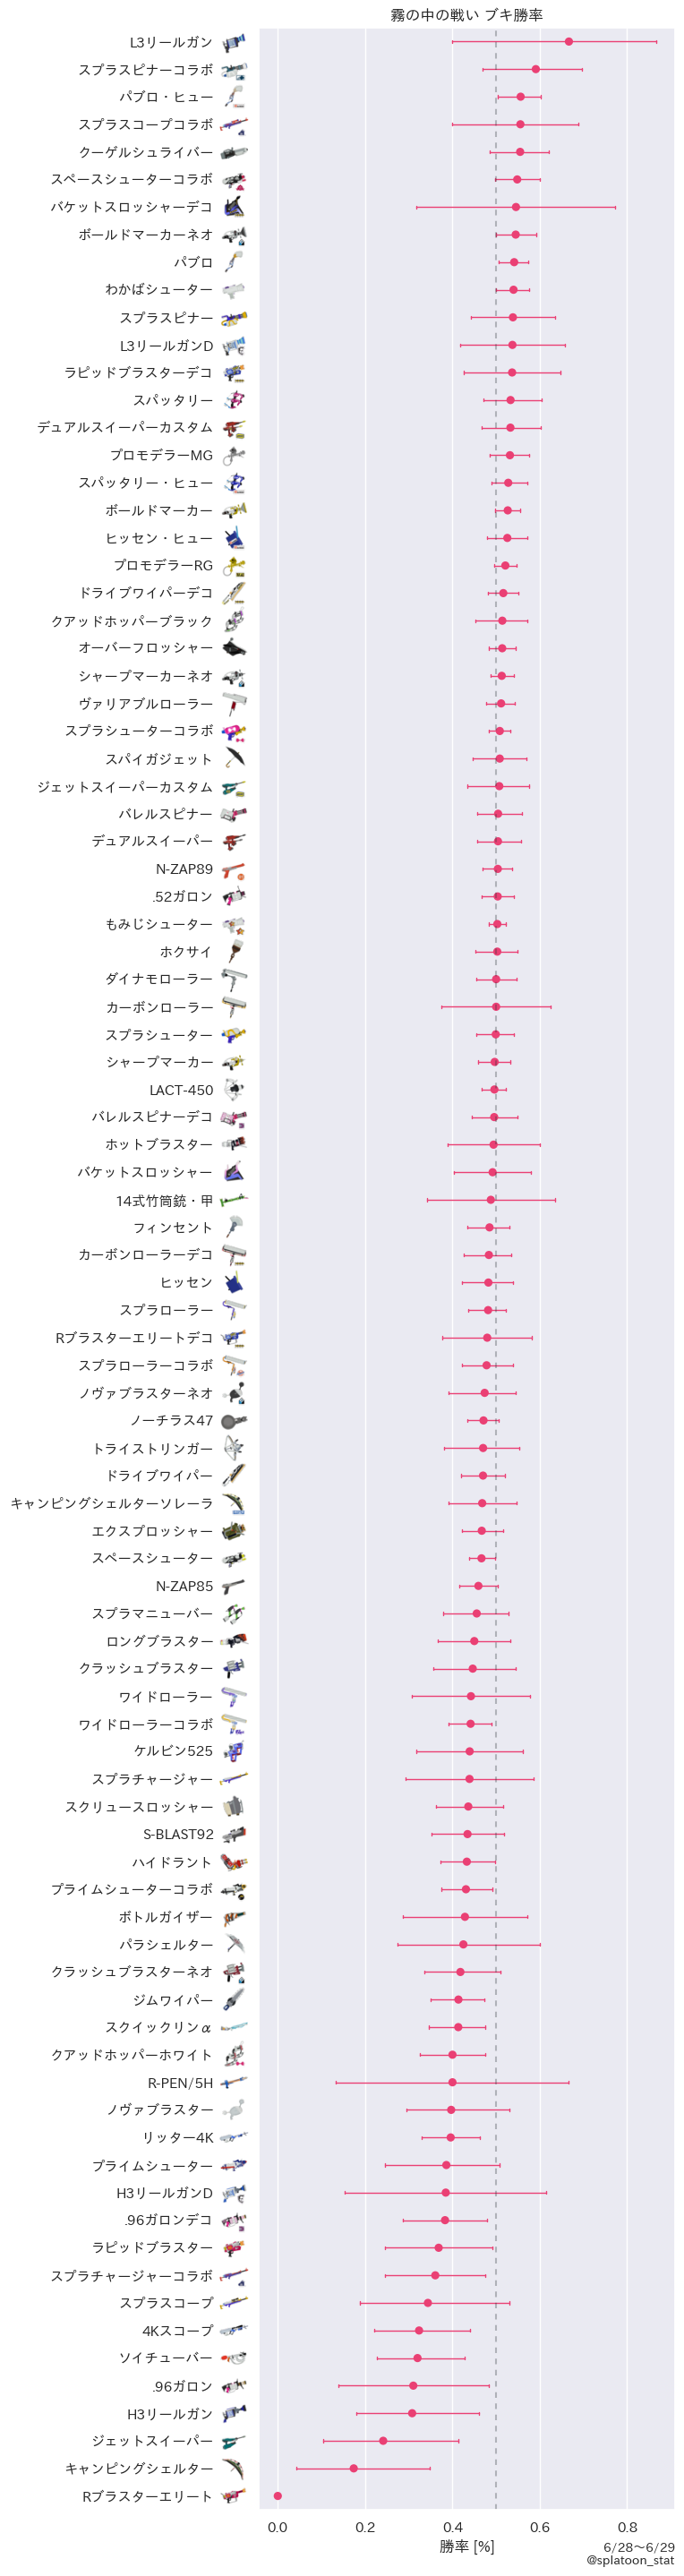

In [5]:
winning_percentage = players.groupby("weapon")["win"].mean().to_frame().sort_values("win", ascending=False)
winning_percentage

sns.set_theme()
japanize()

i18n = Translator(locale)
i18n.add("title", "${event} ブキ勝率", "Weapon winning percentage in ${event}")
i18n.add("winning percentage", "勝率 [%]", "Winning percentage [%]")

fig = plt.figure(figsize=(6, len(winning_percentage) * 0.4))
ax = sns.pointplot(
    data=players,
    order=winning_percentage.index,
    x="win",
    y="weapon",
    color=d.Color.EVENT.value,
    errorbar="ci",
    join=False,
    scale=0.75,
    errwidth=1,
    capsize=0.1,
)

xkeys, ykeys = u.get_ax_ticklabels(ax)
# xticklabels = ["{:.0f}".format(float(x) * 100) for x in xkeys]
yticklabels = [i18n.t(x) for x in ykeys]

xmin, xmax = ax.get_xlim()
image_offset = xmin - (xmax - xmin) * 0.06

ax.set(
    title=i18n.t("title", lobby=i18n.t(lobby.value), event=i18n.t(event)),
    ylabel="",
    xlabel=i18n.t("winning percentage"),
    # xticklabels=xticklabels,
)
ax.yaxis.set_ticklabels(yticklabels, x=-0.08)

plt.axvline(x=0.5, color=d.Color.BACKGROUND.value, alpha=0.3, dashes=(3, 3))

for i, row in enumerate(winning_percentage.iterrows()):
    weapon = row[0]
    image_path = image.get_image_path(weapon)
    img = OffsetImage(plt.imread(image_path), zoom=.65)
    img.image.axes = ax
    ab = AnnotationBbox(img, (0.5, 0), xybox=(image_offset, i), frameon=False)
    ax.add_artist(ab)

u.credit(ax, fig, i18n.t_data_duration(battles), 1.0)

plt.show()

/tmp/ipykernel_27517/2031976904.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(


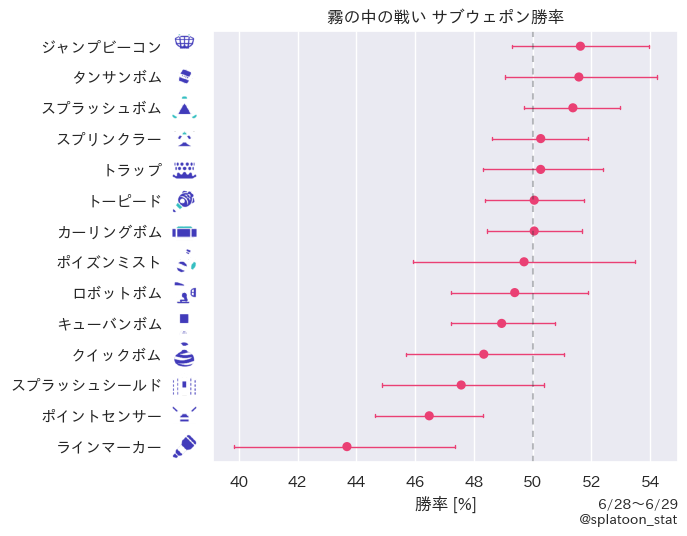

In [6]:
winning_percentage = players.groupby("sub-weapon")["win"].mean().to_frame().sort_values("win", ascending=False)
winning_percentage

sns.set_theme()
japanize()

i18n = Translator(locale)
i18n.add("title", "${event} サブウェポン勝率", "Sub weapon winning percentage in ${event}")
i18n.add("winning percentage", "勝率 [%]", "Winning percentage [%]")

fig = plt.figure(figsize=(6, len(winning_percentage) * 0.4))
ax = sns.pointplot(
    data=players,
    order=winning_percentage.index,
    x="win",
    y="sub-weapon",
    color=d.Color.EVENT.value,
    errorbar="ci",
    join=False,
    scale=0.75,
    errwidth=1,
    capsize=0.1,
)

xkeys, ykeys = u.get_ax_ticklabels(ax)
xticklabels = ["{:.0f}".format(float(x) * 100) for x in xkeys]
yticklabels = [i18n.t(x) for x in ykeys]

xmin, xmax = ax.get_xlim()
image_offset = xmin - (xmax - xmin) * 0.06

ax.set(
    title=i18n.t("title", lobby=i18n.t(lobby.value), event=i18n.t(event)),
    ylabel="",
    xlabel=i18n.t("winning percentage"),
    xticklabels=xticklabels,
)
ax.yaxis.set_ticklabels(yticklabels, x=-0.08)

plt.axvline(x=0.5, color=d.Color.BACKGROUND.value, alpha=0.3, dashes=(3, 3))

for i, row in enumerate(winning_percentage.iterrows()):
    weapon = row[0]
    image_path = image.get_image_path(weapon)
    img = OffsetImage(plt.imread(image_path), zoom=.5)
    img.image.axes = ax
    ab = AnnotationBbox(img, (0.5, 0), xybox=(image_offset, i), frameon=False)
    ax.add_artist(ab)

u.credit(ax, fig, i18n.t_data_duration(battles), 1.0)

plt.show()

/tmp/ipykernel_27517/1804612363.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(


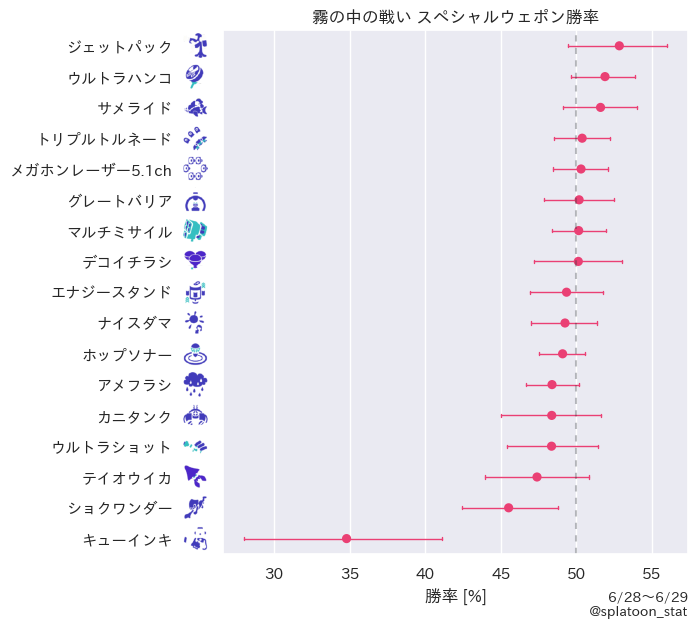

In [7]:
winning_percentage = players.groupby("special-weapon")["win"].mean().to_frame().sort_values("win", ascending=False)
winning_percentage

sns.set_theme()
japanize()

i18n = Translator(locale)
i18n.add("title", "${event} スペシャルウェポン勝率", "Special weapon winning percentage in ${event}")
i18n.add("winning percentage", "勝率 [%]", "Winning percentage [%]")

fig = plt.figure(figsize=(6, len(winning_percentage) * 0.4))
ax = sns.pointplot(
    data=players,
    order=winning_percentage.index,
    x="win",
    y="special-weapon",
    color=d.Color.EVENT.value,
    errorbar="ci",
    join=False,
    scale=0.75,
    errwidth=1,
    capsize=0.1,
)

xkeys, ykeys = u.get_ax_ticklabels(ax)
xticklabels = ["{:.0f}".format(float(x) * 100) for x in xkeys]
yticklabels = [i18n.t(x) for x in ykeys]

xmin, xmax = ax.get_xlim()
image_offset = xmin - (xmax - xmin) * 0.06

ax.set(
    title=i18n.t("title", lobby=i18n.t(lobby.value), event=i18n.t(event)),
    ylabel="",
    xlabel=i18n.t("winning percentage"),
    xticklabels=xticklabels,
)
ax.yaxis.set_ticklabels(yticklabels, x=-0.08)

plt.axvline(x=0.5, color=d.Color.BACKGROUND.value, alpha=0.3, dashes=(3, 3))

for i, row in enumerate(winning_percentage.iterrows()):
    weapon = row[0]
    image_path = image.get_image_path(weapon)
    img = OffsetImage(plt.imread(image_path), zoom=.5)
    img.image.axes = ax
    ab = AnnotationBbox(img, (0.5, 0), xybox=(image_offset, i), frameon=False)
    ax.add_artist(ab)

u.credit(ax, fig, i18n.t_data_duration(battles), 1.0)

plt.show()